# [Rotten Tomatoes Top Movies]

In [20]:
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
from PIL import Image

In [21]:
movies = pd.read_csv('rotten_tomatoes_top_movies_2019-01-15.csv')

In [22]:
movies


,Rank,Title,RatingTomatometer,No. of Reviews,Genres
0,1,Black Panther (2018),97,444,action|adventure
1,2,Mad Max: Fury Road (2015),97,394,action|adventure
2,3,Wonder Woman (2017),93,410,action|adventure
3,4,Metropolis (1927),99,118,action|adventure
4,5,Coco (2017),97,308,action|adventure
...,...,...,...,...,...
1585,70,Priest (2011),15,97,western
1586,71,American Outlaws (2001),14,103,western
1587,72,September Dawn (2007),15,54,western
1588,73,Jonah Hex (2010),12,147,western


In [23]:
nsamples = 50
downSampleMask = np.random.choice(range(len(movies)-1), nsamples, replace=False)
downSampleMask

array([ 531,  881,  141, 1113, 1175,  162,  254,  363, 1404,    0,  959,
        739,  721,  305,  645, 1095,  128,  550,  215,  567,  491, 1257,
        658, 1085,  565,  968,  376,  856,  765,  817,  323, 1102, 1583,
        324,   90,  639, 1448,  933,    4,  647, 1047,  466,  978,  811,
        951,  217, 1131,  678,  860,  790])

### Let's filter only 50 movies randomly, since 1000 is such a large number! 

In [24]:
moviesDS = movies.loc[downSampleMask]
moviesDS

,Rank,Title,RatingTomatometer,No. of Reviews,Genres
531,32,Afghan Star (2009),100,60,documentary
881,82,Lassie (2006),93,68,kids|family
141,42,Persepolis (2007),96,159,animation
1113,14,Carol (2015),94,285,romance
1175,76,Knocked Up (2007),90,248,romance
162,63,Princess Mononoke (Mononoke-hime) (1999),92,106,animation
254,55,Diva (1981),98,48,art_house|international
363,64,2001: A Space Odyssey (1968),93,98,classics
1404,5,Rocky (1976),93,57,sports|fitness
0,1,Black Panther (2018),97,444,action|adventure


In [25]:
moviesDS_heatmap= pd.pivot_table(moviesDS, index = ['RatingTomatometer'], values = ['No. of Reviews'], columns = ['Title'], aggfunc=np.sum)

In [26]:
names = moviesDS_heatmap.columns.levels[1].to_list()

In [27]:
names

['12 Angry Men (Twelve Angry Men) (1957)',
 '2001: A Space Odyssey (1968)',
 'A Field in England (2014)',
 'A Girl Walks Home Alone at Night (2014)',
 'Afghan Star (2009)',
 'Ai Weiwei: Never Sorry (2012)',
 'Big Hero 6 (2014)',
 'Bill Cunningham New York (2011)',
 'Black Panther (2018)',
 'Blue Ruin (2014)',
 'Carol (2015)',
 'Coco (2017)',
 'Diva (1981)',
 'Dust to Glory (2005)',
 'Evil Dead 2: Dead by Dawn (1987)',
 'Finding Nemo (2003)',
 'Forbidden Planet (1956)',
 'Hairspray (1988)',
 'How to Train Your Dragon 2 (2014)',
 'Knocked Up (2007)',
 'Lassie (2006)',
 'Lost in La Mancha (2003)',
 'Love & Mercy (2015)',
 'Mary Poppins (1964)',
 'Metropolis (1927)',
 "Monty Python's Life of Brian (1979)",
 'Nosferatu: Phantom der Nacht (Nosferatu the Vampyre) (1979)',
 'Persepolis (2007)',
 'Phantom Thread (2018)',
 'Princess Mononoke (Mononoke-hime) (1999)',
 'Rocky (1976)',
 'Sid and Nancy (1986)',
 'Sunrise: A Song of Two Humans (1927)',
 'The Big Sick (2017)',
 'The Blair Witch Projec

### Yay! There are names of 50 top-rated movies by Rotten Tomatoes

In [28]:
im1 = Image.open("Beauty and the Beast 1991.jpg")

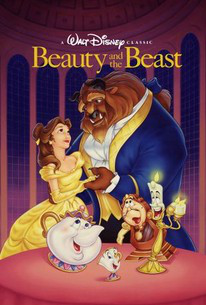

In [29]:
im1

In [30]:
im2 = Image.open("frozen 2013.jpeg")

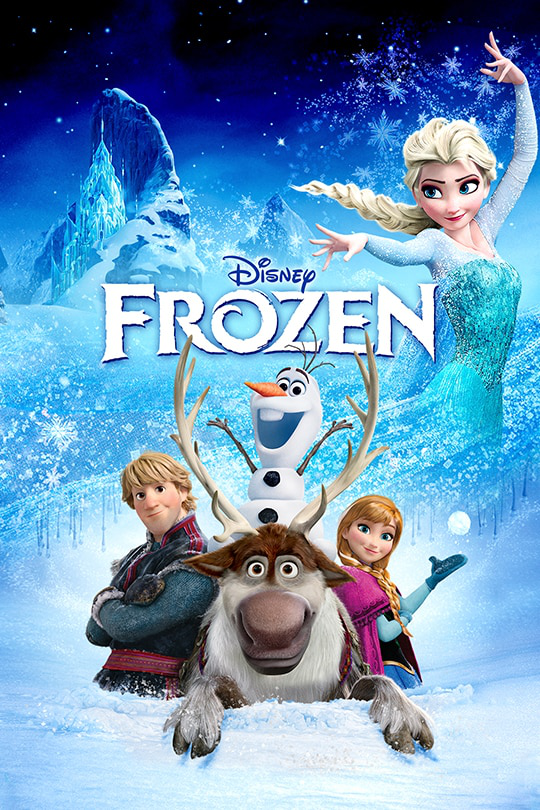

In [31]:
im2

### Here are some examples of listed movies. Everyone's favorite, rights?

#### Now, let's see a heatmap showing the relationship between the rating and the names of the movies. Additionally, you can see the total number of reviews when you click each box! 

In [32]:
# 2. Scales
col_sc = bqplot.ColorScale(scheme = "BuPu")
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# 3. Axis 
c_ax = bqplot.ColorAxis(scale = col_sc,orientation = 'vertical', side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label = 'Title', label_offset = '100px',
                   tick_rotate=45,
                   tick_style= {'front-size' : '3px','tick_offset' : '100px',
                                 'text-anchor' : 'top'})
y_ax = bqplot.Axis(scale = y_sc, orientation = 'vertical',label = 'RatingTomatometer')
                        
# 4. Marks
heat_map = bqplot.GridHeatMap (color = np.log10(moviesDS_heatmap.values), 
                               row = moviesDS_heatmap.index,
                               column = names,
                               scales = {'color' : col_sc,
                                         'row' : y_sc,
                                         'column' : x_sc},
                               interactions = {'click': 'select'}, # select on click
                              anchor_style = {'fill':'blue'},  # fill selection with blue
                              selected_style = {'opacity': 1.0}, #opaque on selection
                              unselected_style = {'opacity': 0.5}) # see-through for non-select

# Interactions -- first ading a label
mySelectedLabel = ipywidgets.Label()

def on_selection(change):
    if len(change['owner'].selected) == 1: # allwoing only 1 selection
        a,b = change['owner'].selected[0]
        v = np.log10(moviesDS_heatmap.values)[a,b] #grab data value
        mySelectedLabel.value = 'No. of Reviews =' + str(v) # set label
        
#2. linking of the heatmap traits with this function
heat_map.observe(on_selection, 'selected')


fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
myDashboard = ipywidgets.VBox ([mySelectedLabel, fig])
myDashboard

#### Additionally, let's see the relationship between the number of reviews and the Rotten Tomato Rating. Do you think there are any connections? 

In [33]:
moviesDS

,Rank,Title,RatingTomatometer,No. of Reviews,Genres
531,32,Afghan Star (2009),100,60,documentary
881,82,Lassie (2006),93,68,kids|family
141,42,Persepolis (2007),96,159,animation
1113,14,Carol (2015),94,285,romance
1175,76,Knocked Up (2007),90,248,romance
162,63,Princess Mononoke (Mononoke-hime) (1999),92,106,animation
254,55,Diva (1981),98,48,art_house|international
363,64,2001: A Space Odyssey (1968),93,98,classics
1404,5,Rocky (1976),93,57,sports|fitness
0,1,Black Panther (2018),97,444,action|adventure


In [34]:
moviesDS.groupby('RatingTomatometer')['No. of Reviews'].sum()

RatingTomatometer
16      248
60       68
87      156
88      132
89      212
90      451
91      842
92      106
93      346
94      439
95      134
96     1047
97      891
98      608
99      452
100     349
Name: No. of Reviews, dtype: int64

In [35]:
m= moviesDS.groupby('RatingTomatometer')['RatingTomatometer']
type(moviesDS['RatingTomatometer'])

pandas.core.series.Series

In [36]:
tomato = np.unique(movies['RatingTomatometer'])
tomato

array([  2,   5,  10,  12,  13,  14,  15,  16,  17,  21,  22,  28,  29,
        30,  31,  32,  33,  35,  36,  40,  41,  43,  45,  48,  49,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  66,  69,
        70,  71,  72,  73,  74,  75,  76,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100], dtype=int64)

In [37]:
# 1. Data
#year = buildings['Year Acquired'].unique()
total_No_of_Reviews = moviesDS.groupby('RatingTomatometer')['No. of Reviews'].sum()

#2. Scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

#3. Axes
ax_x = bqplot.Axis(scale = x_sc, label='RatingTomatometer')
ax_y = bqplot.Axis(scale = y_sc, label='No. of Reviews', orientation= 'vertical')

#4. Marks
lines = bqplot.Lines(x=total_No_of_Reviews.index, y=total_No_of_Reviews.values, scales={'x':x_sc, 'y':y_sc})


#5. Figure
line_fig = bqplot.Figure(marks =[lines], axes= [ax_x, ax_y])
line_fig

Figure(axes=[Axis(label='RatingTomatometer', scale=LinearScale()), Axis(label='No. of Reviews', orientation='v…

## Information about this dataset

### The dataset I'm using is called "rotten_tomatoes_top_movies_2019-01-15.csv" from "data.world". To give a little information about this CSV file itself, the data represents Rotten Tomatoes' top movies by its genres. Before I make a heatmap and line-plot data visualization, the CSV file was a simply tabular dataset showing titles of movies, genres, rank, rating, and the number of reviews. It was a very informative dataset for sure, but I decided to make it more interesting with visualizations and interactivity, for further analysis. 

### In terms of the heat map, it shows the title and rating of each movie. I also down-sampled the movies to 50 out of 1000, in order to make the visualization more efficient. In addition, as I mentioned briefly, if you click each box of the heat-map, you could see a total number of reviews. I thought this is a very interesting data visualization since each box contains very vital components of the dataset itself, so I thought the heat-map is a very efficient way of representing my original dataset, by displaying most of the information all at once. 

### After I made the heat-map, I wanted to know whether there are some kinds of correlations between the number of reviews and ratings. The question I had was whether the number of reviews is equivalent to higher ratings. Therefore, I decided to make a line plot to represent this. As you can see on the graph, there are 'some' correlations. It shows that as the rating becomes higher, the number of ratings is also increasing. This is something that I always have known in my head, but difficult to understand with actual numbers. In conclusion, I thought these two visualizations are great ways of understanding a simple dataset in a very interesting way, which also leads to a better and easy way of understanding the original dataset.


## Sources

### Data:  https://data.world/prasert/rotten-tomatoes-top-movies-by-genre

### Images : Image 1 [https://www.rottentomatoes.com/m/beauty_and_the_beast_1991]
### Image 2 [https://movies.disney.com/frozen]